In [1]:
!python -V

Python 3.12.7


In [2]:
import pandas as pd # working with tabular data
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization

from sklearn.metrics import mean_squared_error # Loss Function

In [52]:
# Download data from NYC: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
!mkdir data
# !wget <files>

# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet

mkdir: cannot create directory ‘data’: File exists


In [20]:
### Load in your parquet files into a pandas dataframe
#df = pd.read_parquet(<path to file>)

df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
#df = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
# df = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

In [42]:
# Calculate your target variable (duration)
# Unlike the csv files the parquet files also stores the data in the datetime format which makes it much easier to operate.
# Pickup and Drop location
# Trip start and end time
# Let’s create a new column duration which calculates the length of each ride :

#df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

# In this case duration is in timedelta format which is not easily trainable. We need to convert this to minutes. 
# This can be done with using the timedelta.total_seconds() function then dividing by 60 to get minutes.

#df['duration_mins'] = df['duration'].apply(lambda td: td.total_seconds() / 60) # we are not doing this for fun, we are doing it to remove 
#outliers as in the link: https://stephen137.github.io/posts/MLOps_Zoomcamp_Week_1/MLOps_Zoomcamp_Week_1.html#:~:text=We%20will%20remove%20these%20outliers%20as%20it%20looks%20as%20if%20they%20are%20due%20to%20measurement%20issues.%20Let%E2%80%99s%20keep%20only%20the%20records%20where%20the%20duration%20was%20between%201%20and%2060%20minutes%20(inclusive).

#df = df[(df.duration >= 1) & (df.duration <= 60)]


In [24]:
# Let's look at our updated dataframe :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[us]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[us]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

In [40]:
#df.dtypes
# Date time captured a datetime64 and not as Object(String)

In [89]:
# Let’s also convert the PULocationID, DOLocationID columns from int64 to strings :

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

### This turns the categorical columns into a list of dictionaries
df[categorical] = df[categorical].astype(str)  ## # Convert to string as it is required in string format for sklearn requirement

train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()   # Instantiate a dictionary vectorizer
dv.fit_transform(train_dicts) # # Fit the vectorizer and transform the data into a feature matrix


# You can Convert the feature matrix above into an array
fm_array = fm.toarray() # where fm = dv.fit_transform(train_dicts)

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)


# # And look at our updated dataframe :
# df.info()below

# df.dtypes

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [28]:
# # Transfor str to datetime
# df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime) 
# df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [29]:
# And look at our updated dataframe for the 3rd time:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[us]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[us]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

In [ ]:
### Great, we now have a duration column and PULocationID and DOLocationID are now correctly showing as datatype object 
# (categorical data, which includes strings).


In [19]:
# Read the data for January. How many records are there?


df.shape

(76518, 22)

In [16]:
# Calculate the duration of each trips in minutes
# df_jan['Duration'] = (df_jan['dropOff_datetime'] - df_jan['pickup_datetime']) / pd.Timedelta(minutes=1)


# df.lpep_dropoff_datetime - df.lpep_pickup_datetime

0       0 days 00:03:56
1       0 days 00:08:45
2       0 days 00:05:58
3       0 days 00:07:05
4       0 days 00:00:04
              ...      
76513   0 days 00:38:00
76514   0 days 00:38:00
76515   0 days 00:11:00
76516   0 days 00:27:00
76517   0 days 00:10:00
Length: 76518, dtype: timedelta64[us]

In [17]:
# df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
# df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,duration_mins
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000,27.000000


/tmp/ipykernel_2457/3447682981.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

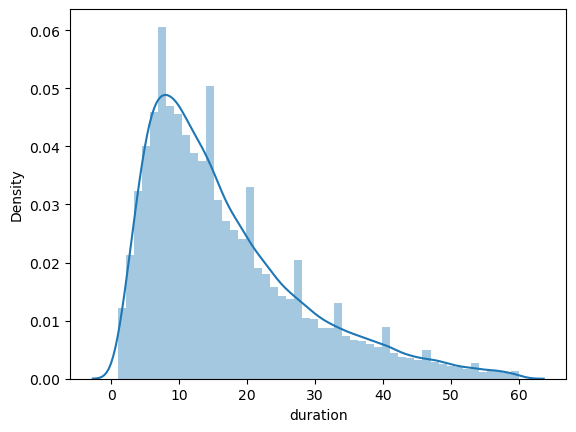

In [67]:
# Filtering


# First look at the distribution of the duration values using seaborn.
sns.distplot(df['duration'])



In [68]:
# Clearly we need some means of filtering the data. One good way is by removing the extreme percentiles at either end. 
# We can determine the percentile cutoffs with the describe function to see where extreme values lie.

df['duration'].describe(percentiles=[0.01, 0.05, 0.95, 0.98, 0.99])


count    73908.000000
mean        16.852578
std         11.563163
min          1.000000
1%           2.000000
5%           3.816667
50%         14.000000
95%         41.000000
98%         48.781000
99%         53.000000
max         60.000000
Name: duration, dtype: float64

### Marcu Note; https://github.com/mleiwe/mlops-zoomcamp/blob/Ch1_Marcus/cohorts/2024/01-intro/Ch1_Notes.md


In [ ]:
### Data Prep
# SUMMARY we are simply tring to convert all str, categorical, code etc into NUMERICALs

# # One-hot - int to object
# df[categorical] = df[categorical].astype(str)

# Prediction features: Basically what are our X values. In the demo we are using PULocationID and DOLocationID which are the pick up 
# and drop off location IDs respectively. Because these are not really numbers but ID codes, these should be reformatted into str rather 
#than float or int or whichever numerical data type. Additionally these then need to be encoded in some machine readable form.


# One-hot encoding creates new columns for each category and fills them either with a 1 if the category is present or a 0 if it is a different value. 
# The advantage is that it is simple and easy to use. The downside is that you can greatly expand your data size by creating large numbers of columns 
# that are mostly filled with 0s (known as creating data sparsity).

# Method 1: Change the type of your pandas series

##   df_jan_filt[CategoricalColumns] = df_jan_filt[CategoricalColumns].astype(str)

# Method 2: One hot encoding
## There are two ways to do this. You can use the OneHotEnoder by scikit-learn which can work with arrays or you can use the dictionary vectoriser, 
# DictVectorizer.


# OneHotEncoder uses fewer lines of code as you don't need to convert your dataframe into a dictionary. And you can specify which columns you want to 
# encode
# DictVectorizer feels like a lower level code. And it will only one-hot encode columns with string values

### There is not one correct answer for all use cases. Above all remember don't us pd.get_dummies() as if a value is not in your test data but in your 
# train data (or vice versa) then you will induce an error as the inputs won't have the same shape.

# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

# # STEPS involves in converting to DictVectorizer
# Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
# Fit a dictionary vectorizer
# Get a feature matrix from it
# Always calc affter ==>What's the dimensionality of this matrix (number of columns)?

### In this example we used the DictVectorizer

  # from sklearn.feature_extraction import DictVectorizer

  # train_dict = df_jan_filt[CategoricalColumns].to_dict(orient='records')
  # dv = DictVectorizer()
  # X_train = dv.fit_transform(train_dict)

### Target feature: This is simply the duration variable so we can just use

# y_train = df_jan_filt['duration']

# NB You can use y_train = df_jan_filt['duration'].values if you need an array instead.

### According to OK Transform from ZooomCamp as in here # https://particle1331.github.io/ok-transformer/nb/mlops/01-intro.html

# To encode categorical features, we use DictVectorizer. This performs one-hot encoding of categorical features while the numerical features are 
# simply passed. Consider a dataset with categorical features f1 with unique values [a, b, c] and f2 with unique values [d, e], and a numerical 
# feature t. The transformed dataset gets features [f1=a, f1=b, f1=c, f2=d, f2=e, t]. For example, {f1: a, f2: e, t: 1.3} is transformed to
# [1, 0, 0, 0, 1, 1.3]. One nice thing about this is that this will not fail with new categories (i.e. these are simply mapped to all zeros).


### According to Steven from ZoomCamp as in here # https://stephen137.github.io/posts/MLOps_Zoomcamp_Week_1/MLOps_Zoomcamp_Week_1.html

# One-hot encoding allows machine learning models to effectively capture categorical information and handle it as numerical input. However, it increases 
# the dimensionality of the data, especially when dealing with variables with many unique categories. This can impact computational efficiency and model 
# performance, especially in cases where the number of categories is large relative to the number of observations.

In [ ]:
### Training/Model fitting
# From here we can just do simple sk-learn model fitting. NB in this example we will use a different dataset as the test data, there is no need to do 
# any cross-validation. In this case we can run the following code

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# lin_reg = LinearRegression()

# lin_reg.fit(X_train,y_train)
# y_pred = lin_reg.predict(X_train)

# rmse = mean_squared_error(y_train, y_pred, squared=False)

# print(f"The RMSE is: {rmse}")



# #To produce a simple visualisation you can use seaborn too

# import seaborn as sns

# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='ground truth')

### `This will not be a really good fit because we are only using categorical values to eastimate a numerical feature`



/tmp/ipykernel_2457/3056548181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

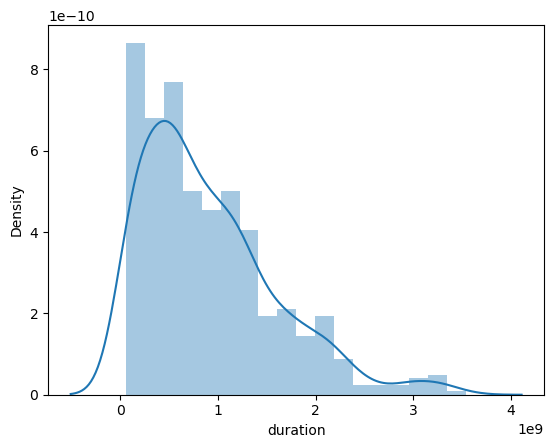

In [54]:
# sns.distplot(df.duration)

# Long Tail with most trips around 10 mins

### How about 
#sns.histplot(df.duration)

In [51]:
# Filtering dataset

# Filter trips between 1 and 60 mins

#df.duration.describe()

In [34]:
#df['duration'].mean() # it is for fhv data only, not for green data


# df = df[df.trip_type == 2 ]
# df

# df.duration.describe(percentiles = [0.95, 0.98, 0.99]) # Does not apply here

#((df.duration >= 1) & (df.duration <= 60)).mean()
# 0.5169628432956381

# df = df[(df.duration >= 1) & (df.duration <= 60)]

# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

#td = df.duration.iloc[0]
#td.total_seconds()/60

### Training/Model fitting

In [60]:
# Let's start building a model
# Remember: This will not be a really good fit because we are only using categorical values to eastimate a numerical feature but here we are converting
#them into 



df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Convert to string, sklearn requirement
df[categorical] = df[categorical].astype(str) ## For One Hot encoding, values must be passed as string to be converted into numerical 

df                        

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73908 entries, 0 to 76517
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73908 non-null  int64         
 1   lpep_pickup_datetime   73908 non-null  datetime64[us]
 2   lpep_dropoff_datetime  73908 non-null  datetime64[us]
 3   store_and_fwd_flag     38175 non-null  object        
 4   RatecodeID             38175 non-null  float64       
 5   PULocationID           73908 non-null  object        
 6   DOLocationID           73908 non-null  object        
 7   passenger_count        38175 non-null  float64       
 8   trip_distance          73908 non-null  float64       
 9   fare_amount            73908 non-null  float64       
 10  extra                  73908 non-null  float64       
 11  mta_tax                73908 non-null  float64       
 12  tip_amount             73908 non-null  float64       
 13  tolls_

In [80]:
# # Apply DictVectorizer ==> Assign dependent variables, Location pair and distance

# ### First, Concatenate the pickup and dropoff location as categorial value
#         # Concatenate the pickup and dropoff location as categorial value
#         # Better prediction than Individual categorial values 

# # df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# # df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']


# # categorical = ['PU_DO']
# # # categotical = ['PULocationID', 'DOLocationID']
# # # mean_squared_error ~ 10
# # numerical = ['trip_distance']



# dv = DictVectorizer()

# train_dicts = df[categorical + numerical].to_dict(orient='records') ##One hot encoding
# X_train = dv.fit_transform(train_dicts)  ### codes for pickup and dropoff are converted to numerical or sparse matrix

# val_dicts = df_val[categotical + numerical].to_dict(orient='records')   ##One hot encoding
# X_val = dv.transform(val_dicts)   ### codes for pickup and dropoff are converted to numerical or sparse matrix

# ### Assign target variable, Duration
# #Extract target variable ==>y_train = df[TargetColumn].values
# target = 'duration'
# y_train = df_train[target].values
# y_val = df_val[target].values


# ### Use LinearRegression to fit Model as in 
# # FIT model: ==> model.fit(X_train, y_train)
# lr = LinearRegression()
# lr.fit(X_train, y_train)


# # PREDICT Model:  y_pred = model.predict(X_train)
# y_pred = lr.predict(X_val)

# #Measure goodness of fit ==> rmse = mean_squared_error(y_train, y_pred, squared=False)
# mean_squared_error(y_val, y_pred)  #, squared=False)

In [82]:
# ### First, Concatenate the pickup and dropoff location as categorial value
#     # Concatenate the pickup and dropoff location as categorial value because it is a Better prediction than Individual categorial values 

# ###  WHY???  Remember: This will not be a really good fit because we are only using categorical values to eastimate a numerical feature but 
# #here we are converting them into 

# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']



# categorical = ['PU_DO']   # categotical = ['PULocationID', 'DOLocationID']
# # mean_squared_error ~ 10
# numerical = ['trip_distance']

In [ ]:
### Use LinearRegression

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred)

In [81]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
dv.fit_transform(train_dicts)


### Check if True or False
dv.fit_transform(train_dicts).todense().shape[1] == df.PULocationID.nunique() + df.DOLocationID.nunique() + 1

### Each trip is represented by a dictionary containing three features:
train_dicts[:3]

### The location IDs are one-hot encoded and the dataset is converted to a sparse matrix:

dv.transform(train_dicts[:3]).todense()

KeyError: "['PU_DO'] not in index"

In [65]:
# ## Read Jan & Feb dataset

# # Training dataset   - JAN
# df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
# # Validation dataset - FEB
# df_val = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

In [ ]:
# Compare length of both dataset
len(df_train), len(df_val)

### OK TRANSFORMER https://particle1331.github.io/ok-transformer/nb/mlops/01-intro.html


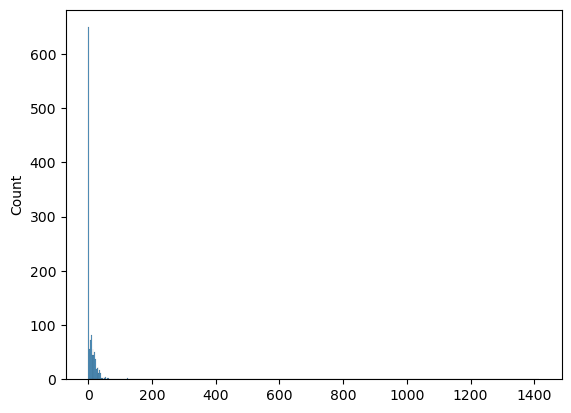

In [46]:
### OK TRANSFORMER https://particle1331.github.io/ok-transformer/nb/mlops/01-intro.html

df['duration (min)'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds() / 60
sns.histplot(df['duration (min)'].values);

# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='actual')

# plt.legend()

In [47]:
df['duration (min)'].describe(percentiles=[0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration (min), dtype: float64

In [ ]:
# Notice the longest trip took ~1400 minutes and there are trips which took <1 minute. We also see that 98% of all rides are within 1 hour. 
# From a business perspective, it makes sense to predict durations that are at least one minute, and at most an hour. 
# Checking the fraction of the dataset with duration that fall in this range:

In [48]:
((df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)).mean()

0.5169628432956381

In [49]:
df = df[(df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,duration_mins,duration (min)
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,None,0.3,13.3,2.0,2.0,0.0,0 days 00:19:46,19.766667,19.766667
53,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,None,0.3,18.3,2.0,2.0,0.0,0 days 00:20:44,20.733333,20.733333
69,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,None,0.3,9.3,2.0,2.0,0.0,0 days 00:08:10,8.166667,8.166667
88,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,None,0.3,15.3,2.0,2.0,0.0,0 days 00:12:59,12.983333,12.983333
96,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,None,0.3,57.3,1.0,2.0,0.0,0 days 00:05:19,5.316667,5.316667


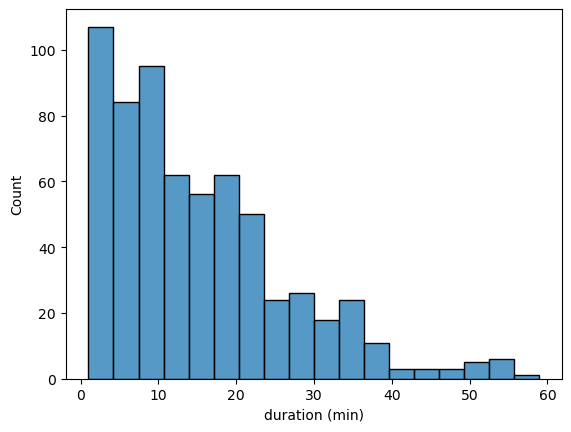

In [50]:
sns.histplot(df['duration (min)'].values)
plt.xlabel("duration (min)");

In [ ]:
### Feature encoding
For the first iteration of the model, we choose only a few variables. In particular, we exclude datetime features which can be relevant. Is it a weekend,
### or a holiday? From experience, we know that these factors can have a large effect on ride duration. But for a first iteration, we only choose the 
### following three features:

# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# # Convert to string, sklearn requirement
# df[categorical] = df[categorical].astype(str)

### According to OK Transform as in here # https://particle1331.github.io/ok-transformer/nb/mlops/01-intro.html

# To encode categorical features, we use DictVectorizer. This performs one-hot encoding of categorical features while the numerical features are 
# simply passed. Consider a dataset with categorical features f1 with unique values [a, b, c] and f2 with unique values [d, e], and a numerical 
# feature t. The transformed dataset gets features [f1=a, f1=b, f1=c, f2=d, f2=e, t]. For example, {f1: a, f2: e, t: 1.3} is transformed to
# [1, 0, 0, 0, 1, 1.3]. One nice thing about this is that this will not fail with new categories (i.e. these are simply mapped to all zeros).

In [85]:
# Let’s also convert the PULocationID, DOLocationID columns from int64 to strings :

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)  ## # Convert to string as it is required in string format for sklearn requirement

train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
dv.fit_transform(train_dicts)

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [86]:
dv.fit_transform(train_dicts).todense().shape[1] == df.PULocationID.nunique() + df.DOLocationID.nunique() + 1

True

In [87]:
train_dicts[:3]

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12}]

In [88]:
dv.transform(train_dicts[:3]).todense()

matrix([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.53],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.12]])

In [90]:
### Baseline model

# In this section, we will train a linear regression model. Note that the validation set consists of data one month after the training set. 
# We will define a sequence of transformations that will be applied to the dataset to get the model features. Note that the model is trained and 
# evaluated only on rides that fall between 1 to 60 minutes.

def filter_ride_duration(df):
    # Create target column and filter outliers
    df['duration (min)'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime   # seconds
    df['duration (min)'] = df['duration (min)'].dt.total_seconds() / 60
    return df[(df['duration (min)'] >= 1) & (df['duration (min)'] <= 60)]

def convert_to_dict(df, features):
    # Convert dataframe to feature dicts
    return df[features].to_dict(orient='records')

def preprocess(df, cat, num):
    df = filter_ride_duration(df)
    df[cat] = df[cat].astype(str)
    df[num] = df[num].astype(float)
    return df

### Note that the above preprocessing steps apply to all datasets (i.e. no concern of data leak). In the following, observe that the vectorizer only sees 
# the training data:

In [101]:
df.shape

(73908, 21)

In [91]:
### In the following, observe that the vectorizer only sees the training data:


# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Preprocessing
cat = ['PULocationID', 'DOLocationID']
num = ['trip_distance']

df_train = preprocess(df_train, cat=cat, num=num)
df_valid = preprocess(df_valid, cat=cat, num=num)

# Preparing features
features = ['PULocationID', 'DOLocationID', 'trip_distance']
D_train = convert_to_dict(df_train, features=features)
D_valid = convert_to_dict(df_valid, features=features)
y_train = df_train['duration (min)']
y_valid = df_valid['duration (min)']

# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)
X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)



/tmp/ipykernel_2457/961437744.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat] = df[cat].astype(str)
/tmp/ipykernel_2457/961437744.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num] = df[num].astype(float)
/tmp/ipykernel_2457/961437744.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

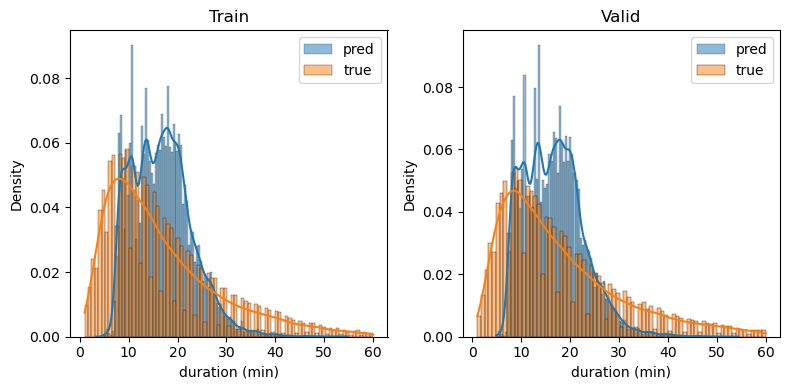

In [92]:
### Training a linear model:

def plot_duration_histograms(y_train, p_train, y_valid, p_valid):
    """Plot true and prediction distributions of ride duration."""
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    sns.histplot(p_train, ax=ax[0], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_train, ax=ax[0], label='true', color='C1', stat='density', kde=True)
    ax[0].set_title("Train")
    ax[0].legend()

    sns.histplot(p_valid, ax=ax[1], label='pred', color='C0', stat='density', kde=True)
    sns.histplot(y_valid, ax=ax[1], label='true', color='C1', stat='density', kde=True)
    ax[1].set_title("Valid")
    ax[1].legend()

    fig.tight_layout();


lr = LinearRegression()
lr.fit(X_train, y_train)

p_train = lr.predict(X_train)
p_valid = lr.predict(X_valid)
plot_duration_histograms(y_train, p_train, y_valid, p_valid)

In [94]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train)))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid)))

RMSE (train): 96.80198150225021
RMSE (valid): 110.23132573784106


In [95]:
### Using interaction features
# Instead of learning separate weights for the pickup and drop off locations, we consider learning weights for combinations of pickup and drop off 
# locations. Note we can also add pick up point as additional feature since we know from experience that directionality can be important.


def add_location_interaction(df):
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    return df

# Load data
df_train = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df_valid = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

# Preprocessing
cat = ['PULocationID', 'DOLocationID']
num = ['trip_distance']
df_train = preprocess(df_train, cat=cat, num=num)
df_valid = preprocess(df_valid, cat=cat, num=num)

# Preparing features
df_train = add_location_interaction(df_train)
df_valid = add_location_interaction(df_valid)

features = ['PU_DO', 'trip_distance']
D_train = convert_to_dict(df_train, features=features)
D_valid = convert_to_dict(df_valid, features=features)
y_train = df_train['duration (min)']
y_valid = df_valid['duration (min)']

# Fit all known categories
dv = DictVectorizer()
dv.fit(D_train)
X_train = dv.transform(D_train)
X_valid = dv.transform(D_valid)

/tmp/ipykernel_2457/961437744.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat] = df[cat].astype(str)
/tmp/ipykernel_2457/961437744.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num] = df[num].astype(float)
/tmp/ipykernel_2457/961437744.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

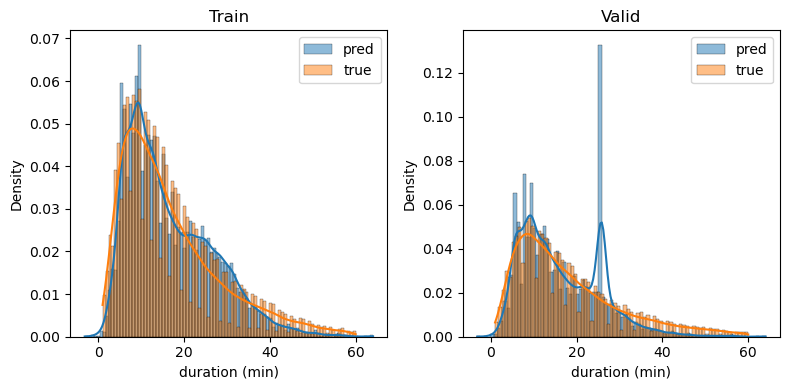

In [96]:
### Using the same model:

lr = LinearRegression()
lr.fit(X_train, y_train)

p_train = lr.predict(X_train)
p_valid = lr.predict(X_valid)
plot_duration_histograms(y_train, p_train, y_valid, p_valid)

In [98]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train)))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid)))

RMSE (train): 32.4850311374611
RMSE (valid): 60.19766164981667


In [ ]:
### Persisting the model

with open('models/lin_reg.bin', 'wb') as fout:
    pickle.dump((dv, lr), fout)

In [100]:
# Print the dimensionality of the feature matrix
dimensionality = X_train.shape
print("Dimensionality:", dimensionality)

Dimensionality: (73908, 13221)


In [ ]:
### So our feature matrix has 73908 rows and 13221 columns (originally (76518, 22) prior to one hot encoding and 
# before removing outlier above 1 & 60min (73908, 21)).

# Note: rows remianed the same for all?? Is this true??

### Stephen from ZoomCamp : https://stephen137.github.io/posts/MLOps_Zoomcamp_Week_1/MLOps_Zoomcamp_Week_1.html

In [103]:
# Customized pre-processing function
# We have carried out a lot of steps to get our data fit for training. We could automate this by creating a customized function :


def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
    

In [ ]:
# Training a model
# Let’s now let’s use the feature matrix from the previous step to train a Linear Regression model :

------------------------------------------------------------------------------
# turn the categorical columns into a list of dictionaries e.g.
# list_of_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Convert categorical columns to a dictionary
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

-----------------------------------------------------------------------------
# Fit the vectorizer and transform the data into a feature matrix e.g.
# fm = dv.fit_transform(list_of_dicts)

# Convert the feature matrix to an array
fm_array = fm.toarray()
-----------------------------------------------------------------------------
# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)


# Set up trainign set
X_train = dv.fit_transform(train_dicts)


# define target variable and assign to y_train
target = 'duration'
y_train = yellow_jan_22[target].values


# instantiate linear regression model with default parameters
lr = LinearRegression()

# fit model to training data
lr.fit(X_train, y_train)


### Get predictions
# Once the model is trained, it can be used to make predictions by plugging in new values for the independent variables. The model assumes that the 
# relationship between the variables remains linear and that the underlying assumptions, such as linearity, independence, and homoscedasticity, hold true.

# get predictions
y_pred = lr.predict(X_train)


### Loss function - RMSE
# The process of building a linear regression model involves estimating the coefficients that minimize a chosen error metric, such as the mean squared 
# error (MSE). This is typically done using a technique called ordinary least squares (OLS), which finds the coefficients that minimize the sum of squared
# differences between the predicted and actual values.

#The RMSE is the square root of the mean squared error (MSE).
# calculate RMSE
mean_squared_error(y_train, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

Linear Regression
A linear regression model is a statistical approach used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the differences between the predicted and actual values.

The model assumes that the dependent variable can be expressed as a linear combination of the independent variables, where each independent variable is multiplied by a coefficient and summed together with an intercept term. The coefficients represent the effect of each independent variable on the dependent variable, and the intercept term represents the expected value of the dependent variable when all independent variables are zero.

Linear regression models are widely used for various purposes, such as predicting sales based on advertising expenditure, analyzing the impact of independent variables on a dependent variable, and making forecasts.

In our case we are going to used linear regression to predict the duration of taxi rides.

In [ ]:
### Evaluating our model - validation set

# Let’s evaluate our model on the unseen Yellow Taxi February 2022 dataset that we downloaded earlier :

# read in the validation set
yellow_feb_22 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

# create a new column 'duration' in minutes
yellow_feb_22['duration'] = yellow_feb_22.tpep_dropoff_datetime - yellow_feb_22.tpep_pickup_datetime
# convert duration to seconds
yellow_feb_22.duration = yellow_feb_22.duration.apply(lambda td: td.total_seconds()/60)

# define categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# convert categorical columns to strings
yellow_feb_22[categorical] = yellow_feb_22[categorical].astype(str)

# remove outliers by clipping duration between 1 and 60 mins
yellow_feb_22 = yellow_feb_22[(yellow_feb_22.duration >= 1) & (yellow_feb_22.duration <= 60)]

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# reinstate our training set
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# turn the categorical columns into a list of dictionaries
val_dicts = yellow_feb_22[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# define target variable and assign to y_val
target = 'duration'
y_train = yellow_jan_22[target].values
y_val = yellow_feb_22[target].values

# instantiate & fit our model to the TRAINING set
lr = LinearRegression()
lr.fit(X_train,y_train)

# Get predictions for the VALIDATION set
y_pred = lr.predict(X_val)

# calculate RMSE
mean_squared_error(y_val, y_pred, squared=False) # squared = False so this is root MSE (RMSE

# Visualization
# We can visualize our predictions versus actuals using the Seaborn library :

sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

# Other models
# Least Absolute Shrinkage and Selection Operator(Lasso)

Lasso regularization adds the absolute value of the coefficients multiplied by a constant, called the regularization parameter or alpha, to the loss function. The main characteristic of Lasso is that it can shrink coefficients all the way to zero, effectively performing feature selection by eliminating irrelevant or less important features. This property makes Lasso useful when dealing with high-dimensional datasets or when trying to identify the most significant predictors.

Lasso tends to perform well when there are many irrelevant features or a need for feature selection. However, it can struggle with highly correlated features or situations where there are more predictors than observations.

In [ ]:
lr = Las
so() # default parameters
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)


lr = Lasso(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)


### Ridge (Tikhonov regularization or L2 regularization)

Ridge regularization adds the squared value of the coefficients multiplied by the regularization parameter to the loss function. Unlike Lasso, Ridge does not eliminate coefficients entirely but shrinks them towards zero without reaching zero. This leads to a reduction in the magnitude of the coefficients, effectively reducing model complexity. Ridge regularization is particularly useful when dealing with multicollinearity, a situation where predictor variables are highly correlated.

The choice between Lasso and Ridge regularization depends on the specific characteristics of the dataset and the goals of the analysis. In practice, it’s common to try both techniques and select the one that yields the best results or combine them in a hybrid approach called Elastic Net regularization.

In [ ]:
lr = Ridge(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

Both the Lasso and Ridge models produce the same results as our standard Linear Regresssion model. This is hardly surprising as our model is only looking at two features, PULocationID and DOLocationID. Let’s include more features.

### Feature engineering
Feature engineering is the process of transforming raw data into meaningful and informative features that can be used by machine learning algorithms. It involves selecting, extracting, and manipulating data attributes to enhance the performance of a model. The goal is to create features that capture relevant patterns, relationships, and insights from the data, leading to better predictive power.

Feature engineering techniques include handling missing values, scaling or normalizing numerical features, encoding categorical variables, creating new features through mathematical operations or domain knowledge, and reducing dimensionality through techniques like principal component analysis (PCA).

Effective feature engineering can significantly impact the performance of machine learning models by improving their accuracy, robustness, and interpretability.

Let’s try Linear Regression again with our categorical columns updated for this new feature:

In [ ]:
df_train = read_dataframe('yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('yellow_tripdata_2022-02.parquet')

df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

***That is a significant improvement. The average prediction error is now down to 5.42 minutes, from 7.79.***

### Saving our model
Pickling is a process in Python that allows you to serialize (convert into a byte stream) and store objects, such as machine learning models, in a file. This serialized object can be saved to disk and later loaded back into memory, allowing you to preserve the model’s state for future use.

The pickle module in Python provides functions for pickling and unpickling objects. When you pickle a model, it saves the model’s parameters, internal state, and other necessary information required for its operation. This allows you to save trained models and use them later without needing to retrain them every time.

Pickling a model is useful for various purposes, such as:

Saving trained models: You can pickle your trained model and store it as a file. Later, you can load the model from the file and use it for making predictions without the need to retrain the model.

Sharing models: Pickling enables you to share models with others, allowing them to use your trained model without requiring access to the original training data or retraining the model.

Deploying models in production: You can pickle a trained model and load it into a production environment for making real-time predictions.

# First, let’s create a new directory to store our model :
!mkdir models




In [ ]:
# And save our model :

with open('./models/lin_reg.bin', 'wb') as f_out: # wb means write binary mlops-zoomcamp/week_1/models
    try:
        # Pickle both the dictionary vectorizer and the linear regression model
        pickle.dump((dv, lr), f_out)
        print("Model successfully pickled.")
    except Exception as e:
        print("Error occurred while pickling the model:", str(e))

Model successfully pickled.